In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv(r"F:/Decodr/Complete/Case Studies/Additional case studies/ARIMA-Forecasting/international-airline-passengers.csv",skipfooter=2)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
df.shape

(144, 2)

In [4]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.tail()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                                                                             144 non-null object
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df["Month"]=pd.to_datetime(df["Month"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                                                                             144 non-null datetime64[ns]
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
df1=df.drop("Month",axis=1)
df1.columns=["volume"]
df1.index=df["Month"]
df1.head()

,volume
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


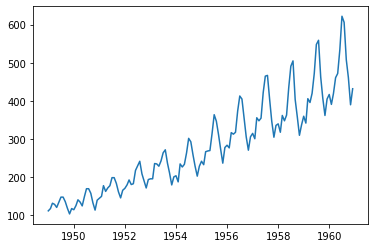

In [11]:
plt.plot(df1)
plt.show()

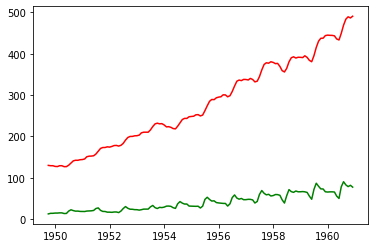

In [12]:
rolling_mean=df1.rolling(10).mean()
rolling_std=df1.rolling(10).std()
plt.plot(rolling_mean,c='r')
plt.plot(rolling_std,c='g')
plt.show()

# dicky fuller test
### pvalue>0.05 -- null hypothesis data is not stationary
### pval<0.05 -- data is stationary

In [13]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(df1["volume"])
adf

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [14]:
print(f"Data is Stationary : {adf[1] < 0.05}")

Data is Stationary : False


In [15]:
df1

,volume
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


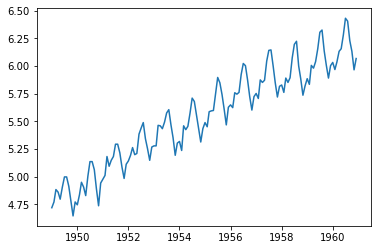

In [16]:
dflog=np.log(df1)
plt.plot(dflog)
plt.show()

In [17]:
dflog=dflog-dflog.shift(1)
dflog.head()

,volume
Month,
1949-01-01,NaN
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022


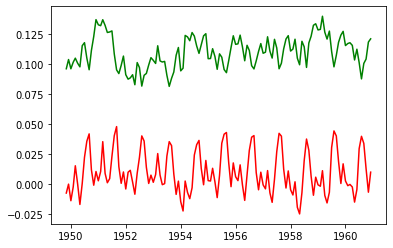

In [18]:
rolling_mean1=dflog.rolling(10).mean()
rolling_std1=dflog.rolling(10).std()
#df1.rolling(10)
plt.plot(rolling_mean1,c='r')
plt.plot(rolling_std1,c='g')
plt.show()

In [19]:
#from statsmodels.tsa.stattools import adfuller
adf = adfuller(dflog["volume"].dropna())
adf

(-2.717130598388145,
 0.0711205481508568,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

In [20]:
print(f"Data is Stationary : {adf[1] < 0.05}")

Data is Stationary : False


In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

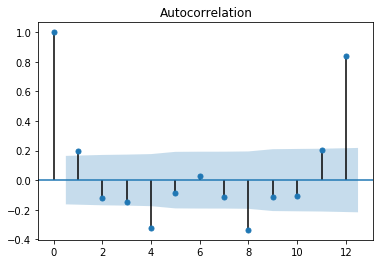

In [22]:
fig=sm.graphics.tsa.plot_acf(dflog["volume"].dropna(),lags=12) #q=2

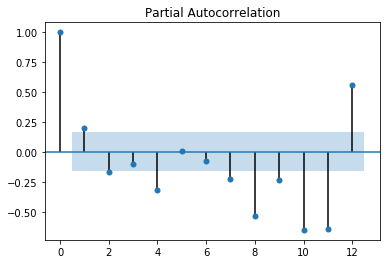

In [23]:
fig=sm.graphics.tsa.plot_pacf(dflog["volume"].dropna(),lags=12) #p=2

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model=ARIMA(df1['volume'],order=(2,1,2))
model_fit=model.fit()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [26]:
df1['forecast'] = model_fit.predict(start=120, dynamic=True)
df1

,volume,forecast
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1960-08-01,606,-4.718272
1960-09-01,508,-7.429018
1960-10-01,461,-7.287821


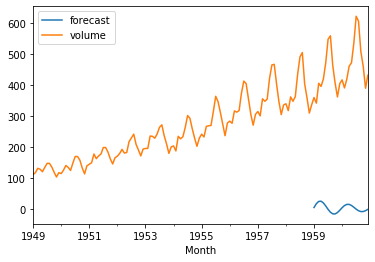

In [27]:
_=df1[['forecast','volume']].plot()

In [28]:
model_srima=sm.tsa.statespace.SARIMAX(df1['volume'],order=(2,1,2),seasonal_order=(2,1,2,12))
model_srima_fit=model_srima.fit()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [29]:
df1['forecast'] = model_srima_fit.predict(start=120, dynamic=True)
df1

,volume,forecast
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
...,...,...
1960-08-01,606,581.245499
1960-09-01,508,482.653465
1960-10-01,461,425.818523


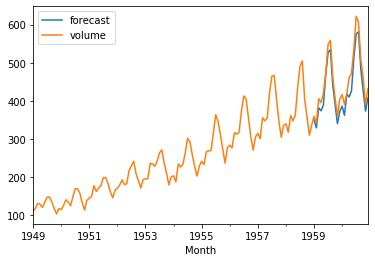

In [30]:
_=df1[['forecast','volume']].plot()